# Thorough Comparison of Reconstruction Methods

**Author:** Jakub Walczak, PhD

The analysis relies on the experiments' results collected for three investigated methods: OK, IDW, and SiNET.
For each out of 100 samples the hyper-parameter optimisation was carried out. Having optimised hyperparameters, 
the evaluation of methods on test test was performed.

In [1]:
from pathlib import Path

import pandas as pd
import numpy as np

In [2]:
NOTEBOOK_DIR = Path(__session__).parent.parent

In [3]:
RESULTS_DIR = NOTEBOOK_DIR / "results"
OK_RESULTS = RESULTS_DIR / "ok"
SINET_RESULTS = RESULTS_DIR / "inr" / "sinet"
IDW_RESULTS = RESULTS_DIR / "idw"

## 1. Metrics Comparison

In [5]:
ok_data = pd.read_csv(OK_RESULTS / "metrics.csv")
sinet_data = pd.read_csv(SINET_RESULTS / "metrics.csv")
idw_data = pd.read_csv(IDW_RESULTS / "metrics.csv")

In [31]:
all_data = pd.merge(
    ok_data,
    sinet_data,
    how="inner",
    on="dataset_id",
    suffixes=["_ok", "_sinet"],
)
all_data = pd.merge(
    all_data,
    idw_data,
    how="inner",
    on="dataset_id"
)
all_data = all_data.rename({"RMSE": "RMSE_idw", "MAE": "MAE_idw", "Max Abs Error": "Max Abs Error_idw", "R^2": "R^2_idw"}, axis=1)
all_data.head()

,dataset_id,RMSE_ok,MAE_ok,Max Abs Error_ok,R^2_ok,RMSE_sinet,MAE_sinet,Max Abs Error_sinet,R^2_sinet,RMSE_idw,MAE_idw,Max Abs Error_idw,R^2_idw
0,18850929,4.444430,3.081765,17.386091,-0.171532,1.689696,0.532692,11.710958,0.725686,0.993635,0.278294,6.919960,0.912333
1,18880915,2.679682,2.008984,10.346641,0.162803,2.107549,1.361672,8.455463,0.505999,1.456847,0.542512,6.657513,0.819470
2,18890110,5.352511,3.544775,35.433115,0.322366,4.559264,1.428978,36.864315,0.419725,3.487422,0.822439,36.536202,0.751687
3,18890925,2.565055,1.386652,15.668172,-0.884138,2.373150,1.124010,13.914103,-0.420548,1.407934,0.455590,8.139961,0.705772
4,18891109,2.962403,1.566861,21.312360,0.432657,94.990448,91.080330,139.680557,-9.696209,2.503587,0.536133,26.065976,0.678598


In [25]:
order = ["idw", "ok", "sinet"]
rmse_best_idx = np.argmin(
    all_data[["RMSE_idw", "RMSE_ok", "RMSE_sinet"]], axis=1
)
r2_best_idx = np.argmax(all_data[["R^2_idw", "R^2_ok", "R^2_sinet"]], axis=1)
mabs_best_idx = np.argmin(
    all_data[["Max Abs Error_idw", "Max Abs Error_ok", "Max Abs Error_sinet"]],
    axis=1,
)

all_data["best_RMSE"] = [order[i] for i in rmse_best_idx]
all_data["best_R^2"] = [order[i] for i in r2_best_idx]
all_data["best_Max Abs Error"] = [order[i] for i in mabs_best_idx]

In [27]:
all_data = all_data[
    [
        "dataset_id",
        "RMSE_idw",
        "RMSE_ok",
        "RMSE_sinet",
        "best_RMSE",
        "Max Abs Error_idw",
        "Max Abs Error_ok",
        "Max Abs Error_sinet",
        "best_Max Abs Error",
        "R^2_idw",
        "R^2_ok",
        "R^2_sinet",
        "best_R^2",
    ]
]

In [28]:
all_data

,dataset_id,RMSE_idw,RMSE_ok,RMSE_sinet,best_RMSE,Max Abs Error_idw,Max Abs Error_ok,Max Abs Error_sinet,best_Max Abs Error,R^2_idw,R^2_ok,R^2_sinet,best_R^2
0,18850929,0.993635,4.444430,1.689696,idw,6.919960,17.386091,11.710958,idw,0.912333,-1.715320e-01,0.725686,idw
1,18880915,1.456847,2.679682,2.107549,idw,6.657513,10.346641,8.455463,idw,0.819470,1.628030e-01,0.505999,idw
2,18890110,3.487422,5.352511,4.559264,idw,36.536202,35.433115,36.864315,ok,0.751687,3.223660e-01,0.419725,idw
3,18890925,1.407934,2.565055,2.373150,idw,8.139961,15.668172,13.914103,idw,0.705772,-8.841377e-01,-0.420548,idw
4,18891109,2.503587,2.962403,94.990448,idw,26.065976,21.312360,139.680557,ok,0.678598,4.326567e-01,-9.696209,idw
5,18900411,1.339539,2.848605,1.884712,idw,7.375492,15.632151,12.168077,idw,0.876965,2.116000e-01,0.734944,idw
6,18900624,1.063808,2.902534,2.174068,idw,7.015275,19.955385,17.912430,idw,0.857044,-1.627546e+00,-0.478259,idw
7,18901219,2.791688,3.702064,3.288796,idw,26.776233,28.759474,26.757952,sinet,0.695930,3.912105e-01,0.535239,idw
8,18960116,2.826385,5.537958,2.833152,idw,25.391670,19.299261,16.291868,sinet,0.860798,6.464373e-02,0.852948,idw
9,18970226,2.258476,3.787219,4.405809,idw,15.584999,14.293705,21.981306,ok,0.925337,7.805252e-01,0.606254,idw


## 2. Hyperparameters analysis

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("dark")

### 2a. Ordinary Kriging

In [89]:
ok_hparams = pd.read_csv(OK_RESULTS / "hparams_summary.csv")

In [90]:
ok_hparams = ok_hparams.drop("dataset_id", axis=1)
ok_hparams.head()

,nlags,anisotropy_scaling,coordinates_type,variogram_model,opt_loss
0,11,5.000000,euclidean,exponential,-1.895713
1,30,1.574664,euclidean,power,-1.891351
2,12,1.480598,euclidean,spherical,-8.552612
3,35,2.801148,euclidean,power,-1.727236
4,2,4.542677,euclidean,spherical,-2.734977


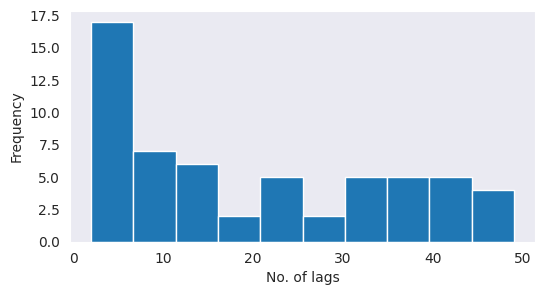

In [91]:
fig, ax = plt.subplots(figsize=(6, 3))
ok_hparams["nlags"].plot.hist(bins=10, ax=ax)
ax.set_xlabel("No. of lags");

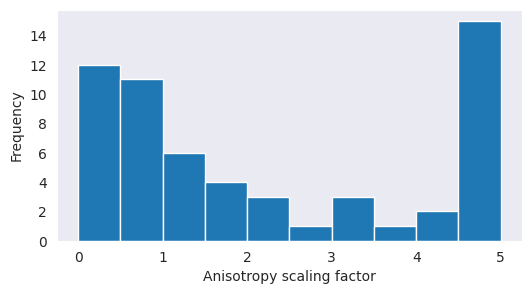

In [92]:
fig, ax = plt.subplots(figsize=(6, 3))
ok_hparams["anisotropy_scaling"].plot.hist(bins=10, ax=ax)
ax.set_xlabel("Anisotropy scaling factor");

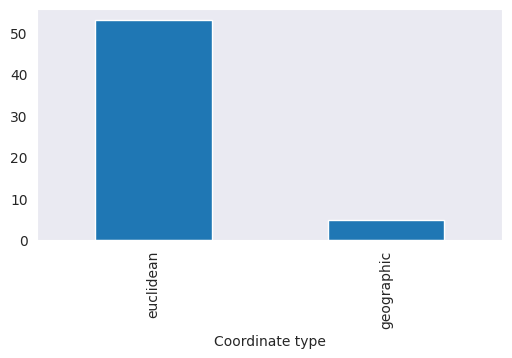

In [93]:
fig, ax = plt.subplots(figsize=(6, 3))
ok_hparams.groupby("coordinates_type").count()["nlags"].plot.bar(ax=ax)
ax.set_xlabel("Coordinate type");

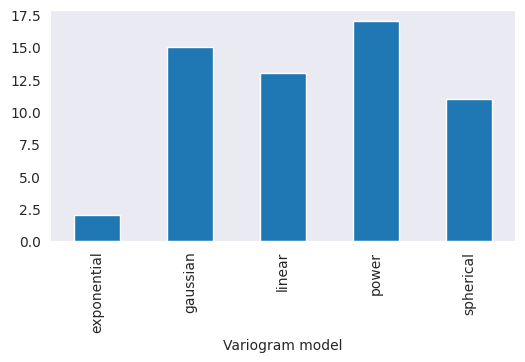

In [94]:
fig, ax = plt.subplots(figsize=(6, 3))
ok_hparams.groupby("variogram_model").count()["nlags"].plot.bar(ax=ax)
ax.set_xlabel("Variogram model");

### 2b. IDW

In [ ]:
idw_hparams = pd.read_csv(IDW_RESULTS / "hparams_summary.csv")

In [ ]:
idw_hparams = sinet_hparams.drop("dataset_id", axis=1)
idw_hparams.head()

In [ ]:
fig, ax = plt.subplots(figsize=(6, 3))
idw_hparams["k"].plot.hist(bins=10, ax=ax)
ax.set_xlabel("No. of neighbours");

In [ ]:
fig, ax = plt.subplots(figsize=(6, 3))
idw_hparams["k_min"].plot.hist(bins=10, ax=ax)
ax.set_xlabel("Min. no. of neighbours");

In [ ]:
fig, ax = plt.subplots(figsize=(6, 3))
idw_hparams["power"].plot.hist(bins=10, ax=ax)
ax.set_xlabel("Power factor");

### 2c. SiNET

In [95]:
sinet_hparams = pd.read_csv(SINET_RESULTS / "hparams_summary.csv")

In [96]:
sinet_hparams = sinet_hparams.drop("dataset_id", axis=1)
sinet_hparams.head()

,lr,num_epochs,gradient_clipping_value,batch_size,mse_loss_weight,eikonal_loss_weight,laplace_loss_weight,early_stopping_patience,opt_loss
0,0.007863,235,6881.833155,531,1.000000,0.000000,0.000000,141,-1.018402
1,0.007068,348,1730.605602,984,0.643898,0.003623,0.000000,92,-0.696362
2,0.010000,221,1551.609740,767,0.000010,0.000000,0.000000,200,-0.926450
3,0.002030,422,5887.823635,521,0.972557,0.000530,0.000066,82,-1.329447
4,0.010000,477,5799.920072,554,0.000010,0.000000,0.000000,101,-1.142449


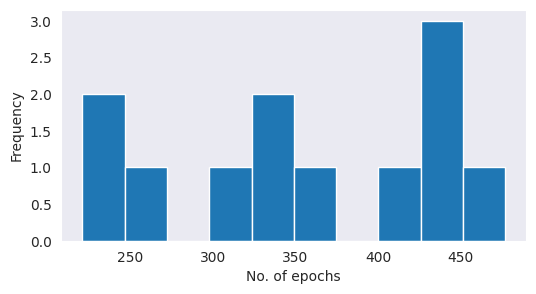

In [97]:
fig, ax = plt.subplots(figsize=(6, 3))
sinet_hparams["num_epochs"].plot.hist(bins=10, ax=ax)
ax.set_xlabel("No. of epochs");

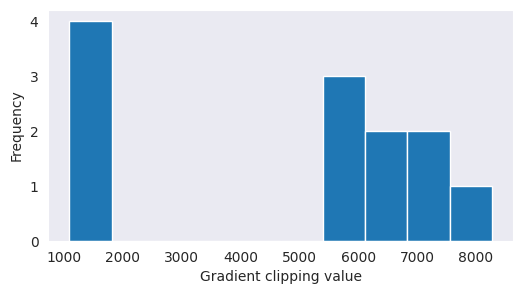

In [98]:
fig, ax = plt.subplots(figsize=(6, 3))
sinet_hparams["gradient_clipping_value"].plot.hist(bins=10, ax=ax)
ax.set_xlabel("Gradient clipping value");

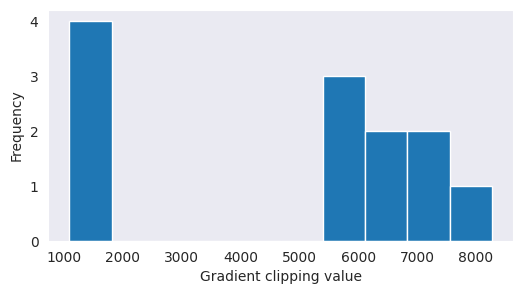

In [99]:
fig, ax = plt.subplots(figsize=(6, 3))
sinet_hparams["gradient_clipping_value"].plot.hist(bins=10, ax=ax)
ax.set_xlabel("Gradient clipping value");

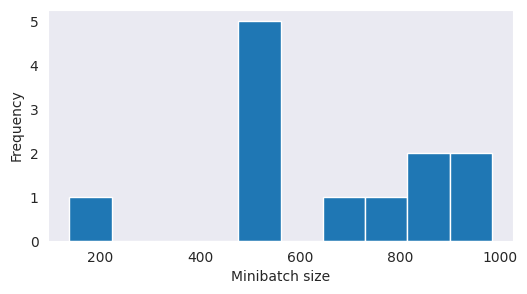

In [100]:
fig, ax = plt.subplots(figsize=(6, 3))
sinet_hparams["batch_size"].plot.hist(bins=10, ax=ax)
ax.set_xlabel("Minibatch size");

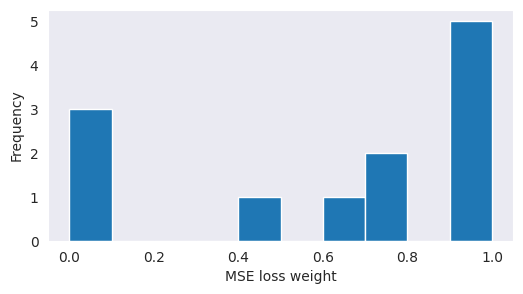

In [101]:
fig, ax = plt.subplots(figsize=(6, 3))
sinet_hparams["mse_loss_weight"].plot.hist(bins=10, ax=ax)
ax.set_xlabel("MSE loss weight");

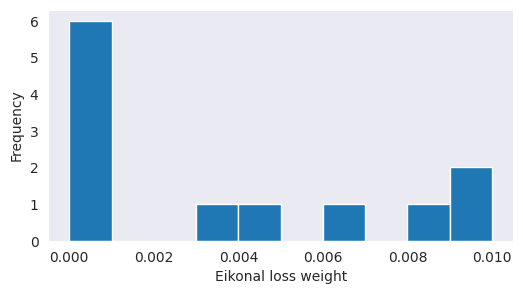

In [102]:
fig, ax = plt.subplots(figsize=(6, 3))
sinet_hparams["eikonal_loss_weight"].plot.hist(bins=10, ax=ax)
ax.set_xlabel("Eikonal loss weight");

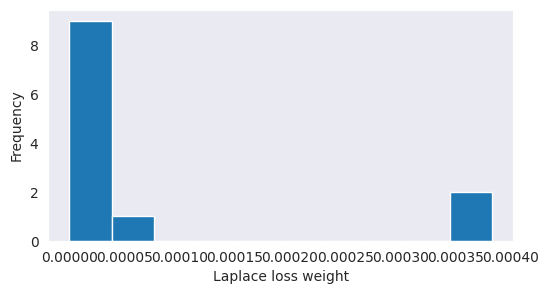

In [103]:
fig, ax = plt.subplots(figsize=(6, 3))
sinet_hparams["laplace_loss_weight"].plot.hist(bins=10, ax=ax)
ax.set_xlabel("Laplace loss weight");

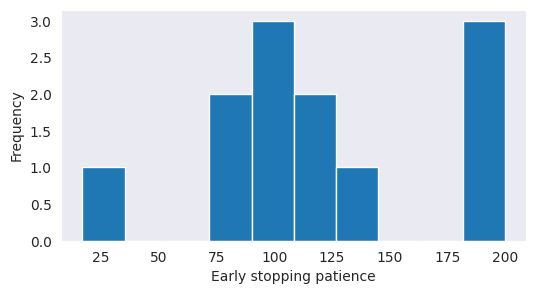

In [104]:
fig, ax = plt.subplots(figsize=(6, 3))
sinet_hparams["early_stopping_patience"].plot.hist(bins=10, ax=ax)
ax.set_xlabel("Early stopping patience");